# **YZV 202E - Term Project - Plan for Efficient Firefighting in Izmir**

### Project Members:

Aybike Battal - 150200343

Ilayda Kara - 150220747

Nazrin Abdinli - 150220925

In [2]:
# Libraries
import random
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import math

#### **Part 1 - Data Preparation**

**First dataset**: The geographical locations and lists of firefighting groups in İzmir

In [3]:
# Replace with your API URL
api_url = "https://openapi.izmir.bel.tr/api/ibb/cbs/itfaiyegruplari"

# Fetch the data from the API
response = requests.get(api_url)
response.raise_for_status()  # This will raise an error for bad status codes

# Assuming the API returns a JSON object
data = response.json()

# Convert the JSON data to a pandas DataFrame
# If the JSON data is a list of dictionaries, you can directly create a DataFrame
df = pd.DataFrame(data)
df_dict = df['onemliyer']
dict_list = df['onemliyer'].tolist()
df_itfaiye_gruplari = pd.DataFrame(dict_list)
df_itfaiye_gruplari


,ILCE,KAPINO,ENLEM,ACIKLAMA,ILCEID,MAHALLE,MAHALLEID,ADI,BOYLAM,YOL
0,BUCA,50A,38.405638,,8,AYDOĞDU,None,Afet Koordinasyon Merkezi,27.191664,ŞEHİT ER MEHMET ÇADIRCI
1,BERGAMA,,39.253723,+90(232) 293 89 12,999,YUKARIBEY,None,Bergama Yukarıbey İtfaiye İstasyonu,27.090147,KOCA
2,TORBALI,2,38.130210,,9,ÇAYBAŞI,None,Çaybaşı İtfaiye İstasyonu,27.385091,7135
3,ÇİĞLİ,817,38.487233,,16,ATAŞEHİR,None,Çiğli İtfaiye İstasyonu,27.074607,ANADOLU
4,DİKİLİ,10,39.077939,,995,İSMETPAŞA,None,Dikili İtfaiye İstasyonu,26.896778,SANAYİ
...,...,...,...,...,...,...,...,...,...,...
87,KONAK,9/1,38.425273,,21,MİMAR SİNAN,None,Sivil Savunma Hizmetleri Birimi,27.146723,9 EYLÜL
88,URLA,3/45-46,38.324374,,18,HACI İSA,None,Urla İtfaiye Denetim ve Önleme Bölge Birimi,26.766465,NECATİ CUMALI
89,KARABAĞLAR,367,38.381937,1870,19,SEVGİ,None,Yeni Çamlık İtfaiye AKS İstasyonu,27.113556,ESKİİZMİR
90,KONAK,185,38.423031,,21,HİLAL,None,Yenişehir İtfaiye İstasyonu,27.153567,GAZİLER


In [4]:
# Finding number of firefighter groups for each district in İzmir

df_ilce_counts = df_itfaiye_gruplari.groupby('ILCE').size().reset_index(name='ITFAIYE_GRUP_SAYISI')
df_ilce_counts

,ILCE,ITFAIYE_GRUP_SAYISI
0,ALİAĞA,2
1,BALÇOVA,2
2,BAYINDIR,1
3,BAYRAKLI,4
4,BERGAMA,2
5,BEYDAĞ,1
6,BORNOVA,5
7,BUCA,11
8,DİKİLİ,2
9,FOÇA,3


**Second dataset:** Firefighting intervention statistics for Izmir in the year 2023

In [5]:
file_path = '2023-yili-yangin-mudahale-istatistigi.csv'

# Read Excel file into DataFrame
df = pd.read_csv(file_path)
selected_columns = ['ILCE','YANGIN_SONUCU', 'VARIS_SURESI (DAK.)', 'KULLANILAN_KOPUK_MIKTARI (KG)', 'KULLANILAN_SU_MIKTARI (m3)', 'KULLANILAN_KURU_KIMYEVI_TOZ_MIKTARI (KG)']
df_yangin_istatistigi = df[selected_columns]

def time_to_minutes(time_str):
    if isinstance(time_str, str):
        if ':' in time_str:
            hours, minutes = time_str.split(':')
            return int(hours) * 60 + int(minutes) 
        else:
            # If ':' is not present, assume the format is minutes only
            return int(time_str) 
    else:
        # If the value is not a string, return the value unchanged
        return time_str


df_yangin_istatistigi['VARIS_SURESI (DAK.)'] = df_yangin_istatistigi['VARIS_SURESI (DAK.)'].apply(time_to_minutes)

df_yangin_istatistigi

<ipython-input-5-73675a26968b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yangin_istatistigi['VARIS_SURESI (DAK.)'] = df_yangin_istatistigi['VARIS_SURESI (DAK.)'].apply(time_to_minutes)


,ILCE,YANGIN_SONUCU,VARIS_SURESI (DAK.),KULLANILAN_KOPUK_MIKTARI (KG),KULLANILAN_SU_MIKTARI (m3),KULLANILAN_KURU_KIMYEVI_TOZ_MIKTARI (KG)
0,KARABAĞLAR,BAŞLANGIÇTA SÖNDÜRÜLEN,4.0,0.0,1.0,0.0
1,KONAK,BAŞLANGIÇTA SÖNDÜRÜLEN,3.0,0.0,0.5,0.0
2,KONAK,BAŞLANGIÇTA SÖNDÜRÜLEN,2.0,0.0,0.0,0.0
3,BORNOVA,KISMEN YANARAK KURTARILAN,4.0,0.0,2.0,0.0
4,URLA,BAŞLANGIÇTA SÖNDÜRÜLEN,6.0,0.0,0.4,0.0
...,...,...,...,...,...,...
12981,BORNOVA,BAŞLANGIÇTA SÖNDÜRÜLEN,5.0,0.0,0.2,0.0
12982,URLA,BAŞLANGIÇTA SÖNDÜRÜLEN,13.0,0.0,0.0,0.0
12983,KARABAĞLAR,BAŞLANGIÇTA SÖNDÜRÜLEN,3.0,0.0,5.0,0.0
12984,SEFERİHİSAR,BAŞLANGIÇTA SÖNDÜRÜLEN,5.0,0.0,0.0,6.0


In [6]:
# Finding the average arrival time to the incident location for each district

df_average_varis_suresi = df_yangin_istatistigi.groupby('ILCE')['VARIS_SURESI (DAK.)'].mean().reset_index()
df_average_varis_suresi.columns = ['ILCE', 'ORTALAMA_VARIS_SURELERI']

df_average_varis_suresi

,ILCE,ORTALAMA_VARIS_SURELERI
0,ALİAĞA,6.305623
1,BALÇOVA,3.880282
2,BAYINDIR,9.807560
3,BAYRAKLI,4.497696
4,BERGAMA,7.044118
5,BEYDAĞ,10.340909
6,BORNOVA,4.294849
7,BUCA,4.367761
8,DİKİLİ,7.110169
9,FOÇA,5.467811


In [7]:
# Finding the average arrival time to the incident location for entire City

average_varis_suresi_all = df_average_varis_suresi['ORTALAMA_VARIS_SURELERI'].mean()
print("The average arrival time is: ", average_varis_suresi_all)

The average arrival time is:  8.444986070098881


*The districts that have larger arrival time than average arrival time need more number of fire stations.*

In [8]:
# Finding the districts that have larger arrival time than average arrival time need more number of fire stations

df_filter_average_varis_suresi = df_average_varis_suresi[df_average_varis_suresi['ORTALAMA_VARIS_SURELERI'] > average_varis_suresi_all]
df_filter_average_varis_suresi

,ILCE,ORTALAMA_VARIS_SURELERI
2,BAYINDIR,9.807560
5,BEYDAĞ,10.340909
13,KARABURUN,9.805556
18,KİRAZ,13.106383
30,İL DIŞI,66.833333


In [9]:
# Finding the the number of fires in 2023 for each district

df_yangin_sayisi = df_yangin_istatistigi.groupby('ILCE').size().reset_index(name='YANGİN_SAYİSİ')
df_yangin_sayisi

,ILCE,YANGİN_SAYİSİ
0,ALİAĞA,411
1,BALÇOVA,142
2,BAYINDIR,291
3,BAYRAKLI,434
4,BERGAMA,612
5,BEYDAĞ,44
6,BORNOVA,1126
7,BUCA,1038
8,DİKİLİ,354
9,FOÇA,233


In [10]:
# Combining the information for each district

data_merged = pd.merge(df_ilce_counts, df_yangin_sayisi, on='ILCE', how='inner')
data_merged = pd.merge(data_merged, df_average_varis_suresi, on='ILCE', how='inner')
data_merged

,ILCE,ITFAIYE_GRUP_SAYISI,YANGİN_SAYİSİ,ORTALAMA_VARIS_SURELERI
0,ALİAĞA,2,411,6.305623
1,BALÇOVA,2,142,3.880282
2,BAYINDIR,1,291,9.807560
3,BAYRAKLI,4,434,4.497696
4,BERGAMA,2,612,7.044118
5,BEYDAĞ,1,44,10.340909
6,BORNOVA,5,1126,4.294849
7,BUCA,11,1038,4.367761
8,DİKİLİ,2,354,7.110169
9,FOÇA,3,233,5.467811


#### **Part 2 - Objective Function and Simulated Annealing**

In [11]:
# Input data
districts = data_merged['ILCE'].tolist()

fires = np.array(data_merged['YANGİN_SAYİSİ'].tolist())

current_stations = np.array(data_merged['ITFAIYE_GRUP_SAYISI'].tolist())

arrival_times = np.array(data_merged['ORTALAMA_VARIS_SURELERI'].tolist())

# Number of districts
N = len(districts)

# Calculate k_i constants
k = arrival_times * current_stations

# Define the total number of stations and budget for additional stations
total_stations = np.sum(current_stations)
budget = 5  # Example budget: number of additional fire stations
max_stations = total_stations + budget

# Objective Function: Minimize weighted average response time
def calculate_total_response_time(fire_stations, total_incidents):
    total_time = 0
    for stations, incidents, ki in zip(fire_stations, total_incidents, k):
        if stations == 0:
            continue
        response_time = ki / stations
        total_time += response_time * incidents
    return total_time

# Simulated Annealing for Optimization
def optimize_fire_stations(fire_stations, total_incidents, iterations=1000, temp=1000, cooling_rate=0.003):
    current_stations = fire_stations[:]
    current_cost = calculate_total_response_time(current_stations, total_incidents)
    best_stations = current_stations[:]
    best_cost = current_cost
    
    for i in range(iterations):
        new_stations = current_stations[:]
        # Randomly choose two districts to swap fire stations
        d1, d2 = random.sample(range(len(districts)), 2)
        if new_stations[d1] > 1:  # Ensure we don't have 0 fire stations
            new_stations[d1] -= 1
            new_stations[d2] += 1
            
        new_cost = calculate_total_response_time(new_stations, total_incidents)
        # Acceptance probability
        if new_cost < current_cost or random.uniform(0, 1) < math.exp((current_cost - new_cost) / temp):
            current_stations = new_stations[:]
            current_cost = new_cost
            
            if current_cost < best_cost:
                best_stations = current_stations[:]
                best_cost = current_cost
        
        # Cool down
        temp *= (1 - cooling_rate)
        
    return best_stations, best_cost

# Running the optimization
optimized_stations, optimized_cost = optimize_fire_stations(current_stations, fires)

print("Optimized Fire Stations Allocation:", optimized_stations)
print("Optimized Total Response Time:", optimized_cost)



Optimized Fire Stations Allocation: [4 4 3 3 1 5 3 8 2 3 7 1 4 2 1 7 4 4 8 2 1 1 1 4 2 1 1 4 1]
Optimized Total Response Time: 73744.65899770736


#### **Part 3 - Genetic Algorithm**

In [12]:
# Input data
districts = data_merged['ILCE'].tolist()

fires = np.array(data_merged['YANGİN_SAYİSİ'].tolist())

current_stations = np.array(data_merged['ITFAIYE_GRUP_SAYISI'].tolist())

arrival_times = np.array(data_merged['ORTALAMA_VARIS_SURELERI'].tolist())

# Number of districts
N = len(districts)

# Calculate k_i constants
k = arrival_times * current_stations

# Define the total number of stations and budget for additional stations
total_stations = np.sum(current_stations)
budget = 5  # Example budget: number of additional fire stations
max_stations = total_stations + budget

# Objective Function: Minimize weighted average response time
def calculate_fitness(chromosome):
    weighted_sum = np.sum(fires * (k / chromosome))
    return weighted_sum / np.sum(fires)

# Create initial population
def create_individual():
    individual = np.copy(current_stations)
    while np.sum(individual) < max_stations:
        i = random.randint(0, N-1)
        individual[i] += 1
    while np.sum(individual) > max_stations:
        i = random.randint(0, N-1)
        if individual[i] > 1:
            individual[i] -= 1
    return individual

def create_population(pop_size):
    return [create_individual() for _ in range(pop_size)]

# Selection: Tournament selection
def tournament_selection(population, fitnesses, k=3):
    selected = []
    for _ in range(len(population)):
        aspirants = random.sample(range(len(population)), k)
        selected.append(min(aspirants, key=lambda x: fitnesses[x]))
    return [population[i] for i in selected]

# Crossover: Two-point crossover
def crossover(parent1, parent2):
    if random.random() < cxpb:
        point1, point2 = sorted(random.sample(range(N), 2))
        child1 = np.concatenate((parent1[:point1], parent2[point1:point2], parent1[point2:]))
        child2 = np.concatenate((parent2[:point1], parent1[point1:point2], parent2[point2:]))
        return child1, child2
    return parent1, parent2

# Mutation: Uniform mutation
def mutate(individual):
    for i in range(N):
        if random.random() < mutpb:
            individual[i] = random.randint(1, 5)
    return individual

# Genetic Algorithm parameters
population_size = 100
num_generations = 50
cxpb = 0.5  # Crossover probability
mutpb = 0.2  # Mutation probability

# Create initial population
population = create_population(population_size)

# Run the genetic algorithm
for gen in range(num_generations):
    fitnesses = [calculate_fitness(ind) for ind in population]

    # Select individuals for the next generation
    selected = tournament_selection(population, fitnesses)
    next_population = []

    # Apply crossover and mutation to create the next generation
    for i in range(0, population_size, 2):
        parent1, parent2 = selected[i], selected[i+1]
        child1, child2 = crossover(parent1, parent2)
        next_population.append(mutate(child1))
        next_population.append(mutate(child2))

    # Ensure all individuals are valid
    for i in range(len(next_population)):
        while np.sum(next_population[i]) > max_stations:
            j = random.randint(0, N-1)
            if next_population[i][j] > 1:
                next_population[i][j] -= 1
        while np.sum(next_population[i]) < total_stations:
            j = random.randint(0, N-1)
            next_population[i][j] += 1

    population = next_population

# Get the best individual
fitnesses = [calculate_fitness(ind) for ind in population]
best_individual = population[np.argmin(fitnesses)]
best_fitness = min(fitnesses)

print("Best individual is:", best_individual)
print("Best fitness is:", best_fitness)



Best individual is: [3 2 1 5 4 1 5 6 5 4 1 1 3 5 5 4 4 3 4 2 1 1 2 5 4 2 2 2 5]
Best fitness is: 6.589336637228322


#### **Part 4 - Particle Swarm Optimization**

In [13]:
# Input data
districts = data_merged['ILCE'].tolist()

fires = np.array(data_merged['YANGİN_SAYİSİ'].tolist())

current_stations = np.array(data_merged['ITFAIYE_GRUP_SAYISI'].tolist())

arrival_times = np.array(data_merged['ORTALAMA_VARIS_SURELERI'].tolist())

# Number of districts
N = len(districts)

# Calculate k_i constants
k = arrival_times * current_stations

# Define the total number of stations and budget for additional stations
total_stations = np.sum(current_stations)
budget = 5  # Example budget: number of additional fire stations
max_stations = total_stations + budget

# Objective Function: Minimize weighted average response time
def calculate_fitness(chromosome):
    weighted_sum = np.sum(fires * (k / chromosome))
    return weighted_sum / np.sum(fires)

# Define PSO parameters
swarmsize = 100
maxiter = 50
c1 = 2.0
c2 = 2.0
w = 0.7

# Define bounds for each dimension (each district)
lb = np.array([1] * N)  # Lower bounds (minimum 1 fire station per district)
ub = np.array([5] * N)  # Upper bounds (maximum 5 fire stations per district)

# Initialize particles and velocities
particles = np.random.uniform(lb, ub, size=(swarmsize, N)).astype(int)
velocities = np.zeros_like(particles)
pbest = particles.copy()
pbest_fitness = np.array([calculate_fitness(p) for p in particles])
gbest = particles[np.argmin(pbest_fitness)].copy()
gbest_fitness = np.min(pbest_fitness)

# Ensure valid initial particles
def ensure_valid(particle):
    while np.sum(particle) < total_stations:
        i = random.randint(0, N-1)
        if particle[i] < ub[i]:
            particle[i] += 1
    while np.sum(particle) > max_stations:
        i = random.randint(0, N-1)
        if particle[i] > lb[i]:
            particle[i] -= 1
    return particle

particles = np.array([ensure_valid(p) for p in particles])
pbest = particles.copy()
pbest_fitness = np.array([calculate_fitness(p) for p in particles])
gbest = particles[np.argmin(pbest_fitness)].copy()
gbest_fitness = np.min(pbest_fitness)

# Run PSO
for iteration in range(maxiter):
    for i in range(swarmsize):
        fitness = calculate_fitness(particles[i])
        if fitness < pbest_fitness[i]:
            pbest[i] = particles[i].copy()
            pbest_fitness[i] = fitness
            if fitness < gbest_fitness:
                gbest = particles[i].copy()
                gbest_fitness = fitness

    for i in range(swarmsize):
        r1 = np.random.rand(N)
        r2 = np.random.rand(N)
        velocities[i] = w * velocities[i] + c1 * r1 * (pbest[i] - particles[i]) + c2 * r2 * (gbest - particles[i])
        particles[i] = np.clip(particles[i] + velocities[i], lb, ub).astype(int)
        particles[i] = ensure_valid(particles[i])

# Output results
print("Optimal allocation (PSO):", gbest.astype(int))
print("Optimal total response time (PSO):", gbest_fitness)

Optimal allocation (PSO): [3 2 3 4 4 1 5 5 3 3 2 2 5 2 5 2 5 2 5 5 1 1 3 5 3 4 3 4 5]
Optimal total response time (PSO): 5.404548327589036


#### **Part 5 - Evaluation and Visualization**

Comparison of the Number of Firefighter Groups Before and After Application of the SA, GA and PSO Algorithms

In [14]:
table = [["District", "Initial", "GA", "SA", "PSO"]]
for i in range(len(districts)):
    table.append([districts[i], data_merged['ITFAIYE_GRUP_SAYISI'].tolist()[i], best_individual[i], optimized_stations[i], gbest.astype(int)[i]])

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="grid"))

+-------------+-----------+------+------+-------+
| District    |   Initial |   GA |   SA |   PSO |
+=============+===========+======+======+=======+
| ALİAĞA      |         2 |    3 |    4 |     3 |
+-------------+-----------+------+------+-------+
| BALÇOVA     |         2 |    2 |    4 |     2 |
+-------------+-----------+------+------+-------+
| BAYINDIR    |         1 |    1 |    3 |     3 |
+-------------+-----------+------+------+-------+
| BAYRAKLI    |         4 |    5 |    3 |     4 |
+-------------+-----------+------+------+-------+
| BERGAMA     |         2 |    4 |    1 |     4 |
+-------------+-----------+------+------+-------+
| BEYDAĞ      |         1 |    1 |    5 |     1 |
+-------------+-----------+------+------+-------+
| BORNOVA     |         5 |    5 |    3 |     5 |
+-------------+-----------+------+------+-------+
| BUCA        |        11 |    6 |    8 |     5 |
+-------------+-----------+------+------+-------+
| DİKİLİ      |         2 |    5 |    2 |     3 |


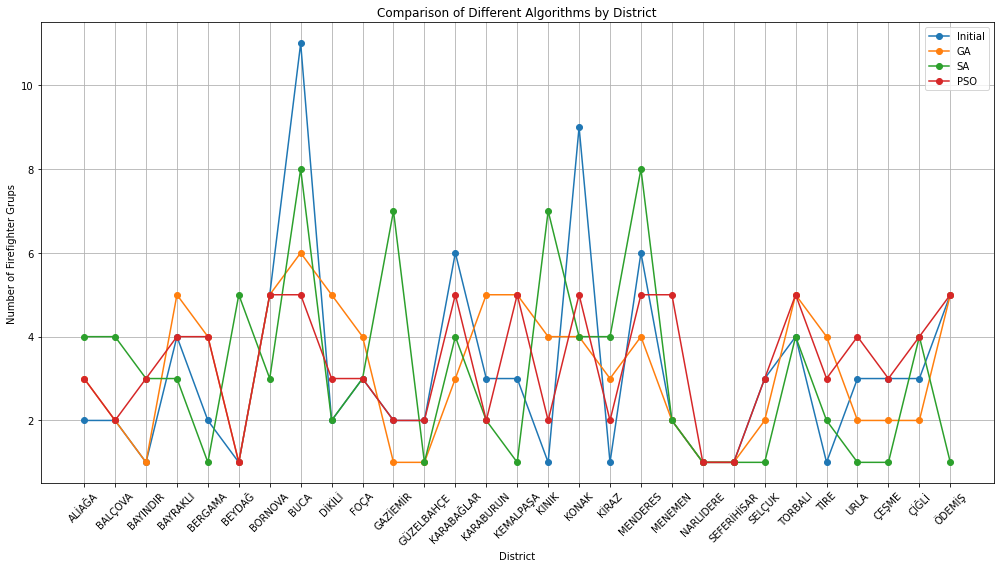

In [15]:
# Extract data for the graph
districts_list = districts
initial = data_merged['ITFAIYE_GRUP_SAYISI'].tolist()
ga = best_individual
sa = optimized_stations
pso = gbest.astype(int)

# Plot the graph
plt.figure(figsize=(14, 8))

# Plot each line
plt.plot(districts_list, initial, label='Initial', marker='o')
plt.plot(districts_list, ga, label='GA', marker='o')
plt.plot(districts_list, sa, label='SA', marker='o')
plt.plot(districts_list, pso, label='PSO', marker='o')

# Add title and labels
plt.title('Comparison of Different Algorithms by District')
plt.xlabel('District')
plt.ylabel('Number of Firefighter Groups')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()